# Motor Escalar Autograd

Este proyecto es un motor autograd que usa únicamente valores escalares. Es capaz de guardar datos de variables en operaciones matemáticas y después calcular su comportamiento teniendo en cuenta sus hijos. Este tipo de técnica se usa para el entrenamiento de redes neuronales, con la finalidad de maximizar la eficiencia de las mismas.

El proyecto se separa en dos ficheros **_'engine.py'_**, que contiene todo lo necesario para crear y modificar valores, y **_'neural_network.py'_**, que contiene todo el código referente a la red neuronal.

## Engine.py

El fichero **_'engine.py'_** contiene el código necesario para el tratamiento de datos, como por ejemplo la creacion de objetos _Value_ y sus operaciones matemáticas como la _suma, resta, multiplicación, división, potencia, negación_ y otras funciones para conseguir la _uncidad lineal rectificada (ReLU)_ o para la _retropropagación_.

- Clase **_Value_** y sus parametros:

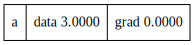

In [30]:
import visualization as vs

class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print fucntion
        return f"Value(data={self.data}, grad={self.grad})"

'''Example'''
a = Value(3, label='a')

vs.draw_dot(a)

- Operador de **_suma_** → ($x+y$):

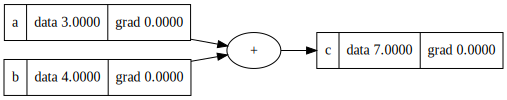

In [31]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

'''Example'''
a = Value(3, label='a')
b = Value(4, label='b')
c = a + b; c.label = 'c'
c

vs.draw_dot(c)

- Operador **_multiplicación_** → ($x*y$):

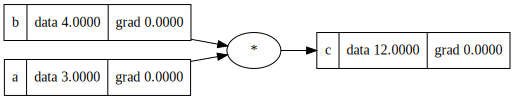

In [25]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

'''Example'''
a = Value(3, label='a')
b = Value(4, label='b') 
c = a * b; c.label = 'c'
c

vs.draw_dot(c)

- Operador **_potencia_** → ($x^y$):

    (solamente permite usar números enteros/reales como potencia)

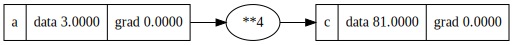

In [24]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

'''Example'''
a = Value(3, label='a')
b = 4
c = a ** b; c.label = 'c'
c

vs.draw_dot(c)

- Unidad lineal rectificada _(ReLU)_ → ($f(x) = max(0,x)$):

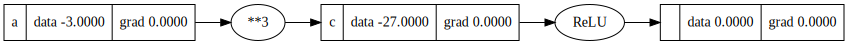

In [ ]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

'''Example'''
#if the output is negative, returns 0
a = Value(-3, label='a')
b = 3
c = a ** b; c.label = 'c'
d = c.relu(); d.label = 'd' # returns 0

vs.draw_dot(d)


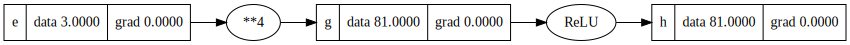

In [47]:
#if the output is positive, returns the output
e = Value(3, label='e')
f = 4
g = e ** f; g.label = 'g'
h = g.relu(); h.label = 'h' # returns 81

vs.draw_dot(h)

- Retropropagación:

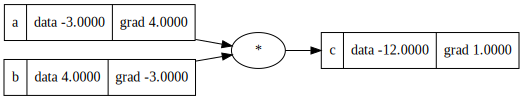

In [38]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self): # backpropagation
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()

'''Example'''
a = Value(-3, label='a')
b = Value(4, label='b')
c = a * b; c.label = 'c'
c.backward()

vs.draw_dot(c)

- Operador de **_negación_** ($-x$):

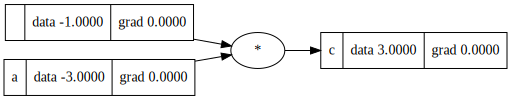

In [37]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self): # backpropagation
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()
    
    def __neg__(self): # -self
        return self * -1

'''Example'''
a = Value(-3, label='a')
c = -a; c.label = 'c'

vs.draw_dot(c)

- Operador de **_resta_** ($x-y$):

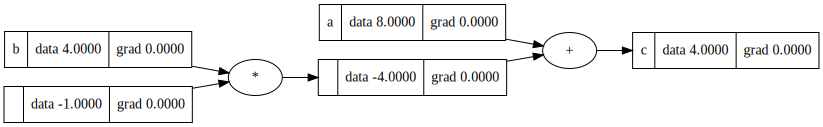

In [48]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self): # backpropagation
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a - b; c.label = 'c'

vs.draw_dot(c)

- Operador de **_división_** ($x/y$):

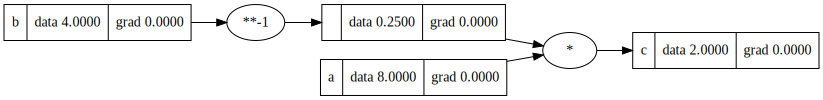

In [49]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self): # backpropagation
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __truediv__(self, other): # self / other
        return self * other**-1

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a / b; c.label = 'c'

vs.draw_dot(c)

Aparte de todos los anteriores, la clase _Value_ tiene propiedades para guardar los hijos y los operadores que se han usado para conseguir el objeto actual:

- Propiedad para acceder a los hijos del nodo actual *(._prev)*:

In [ ]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self): # backpropagation
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __truediv__(self, other): # self / other
        return self * other**-1

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a / b; c.label = 'c'

c._prev # returns the children of c, in this case a and b

{Value(data=0.25, grad=0), Value(data=8, grad=0)}

- Propiedad para acceder al tipo de operador que ha creado el nodo actual *(._op)*:

In [60]:
class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print function
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other): # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other): # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other): # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def relu(self): # ReLU function
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self): # backpropagation
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __truediv__(self, other): # self / other
        return self * other**-1

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a / b; c.label = 'c'

c._op # returns the operator that was used to create the value, in this case multiplication '*'

'*'

## Neural_network.py